---

<h1><center>SDSE Homework 3 <br><br> Problem 1: Using SVD for Image Compression </center></h1>

---

This problem demonstrates the use of SVD for compressing images. We will do this with a very simple and clean image of a black circle. You will use Python to load the image, run the singular value decomposition, and then create and view images with different levels of compression. Please begin by replacing `None` below with your student id number. 

In [1]:
result = {
    'SID': 3038661550 # enter your SID
}

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

The next cell will load an image from a file, store it in the variable `X`, and plot it using `plt.imshow`. 

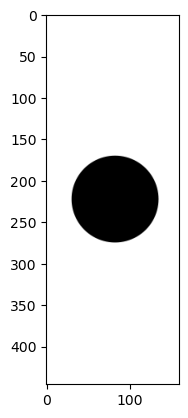

In [3]:
# Load the data from a pickle file
with open('data_circle.pickle', 'rb') as file:
    X = pickle.load(file)   
    
# Display the data matrix as an image
plt.imshow(X,cmap='gray')

# 1) Data dimensions

Record the number of rows and columns of `X` in variables `N` and `D` respectively. (2 pts)

In [4]:
N = X.shape[0] # Add your code here
D = X.shape[1] # Add your code here

In [5]:
################################
# Reporting. Do not modify.#####
result['N'] = N
result['D'] = D
################################

# 2) Run SVD
This has already be done for you. We are using the implementation of SVD from scipy's `linalg` package. Please refer to the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) for `linalg.svd` to understand the syntax. Notice the shapes of the resulting matrices.

In [6]:
from scipy import linalg
U, s, Vt = linalg.svd(X, full_matrices=True)
sigma = linalg.diagsvd(s, N, D)
U.shape, s.shape, Vt.shape

((446, 446), (160,), (160, 160))

# 3) Matrix rank
Compute the rank of X using [`np.linalg.matrix_rank`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_rank.html). Record it to the variable `rank`. (2 pts)

In [7]:
rank = np.linalg.matrix_rank(X)
rank

67

In [8]:
################################
# Reporting. Do not modify.#####
result['rank'] = rank
################################

# 4) Plot the singular values
Use [`plt.semilogy`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html) to plot the sequence of singular values. (4 pts)

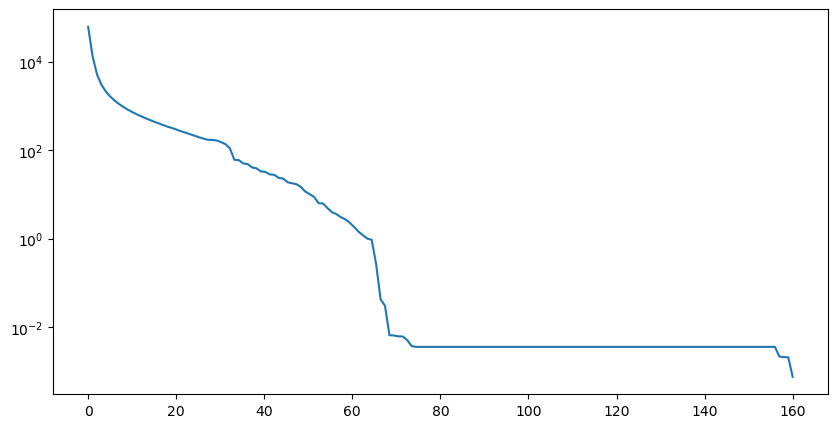

In [9]:
fig4 = plt.figure(figsize=(10,5))
plt.semilogy(np.linspace(0, len(s), len(s)), s)

In [10]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4
################################

# 5) Plot first 20 columns of $U \Sigma$ using [`plt.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) (6 pts)

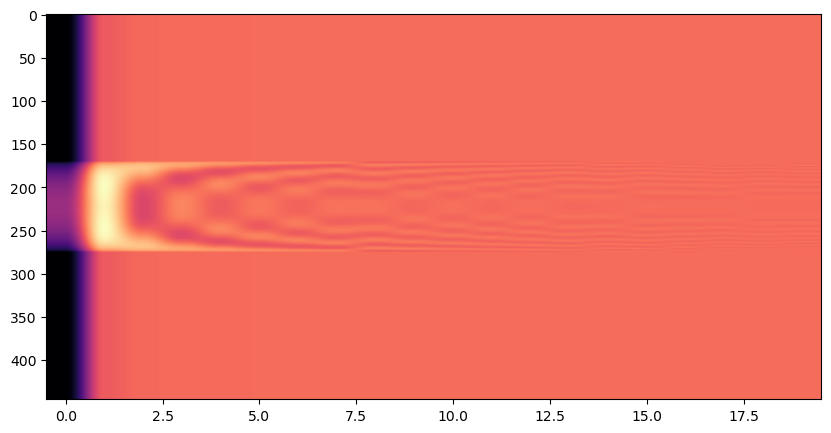

In [11]:
fig5 = plt.figure(figsize=(10,5))
r = 20
US = U @ sigma
plt.imshow(US[:,:r], aspect='auto', cmap='magma')

In [12]:
np.diag(s).shape

(160, 160)

In [13]:
################################
# Reporting. Do not modify.#####
result['fig5'] = fig5
################################

# 6) Plot first 20 rows of $\Sigma V^T$ using `plt.imshow` (6 pts)

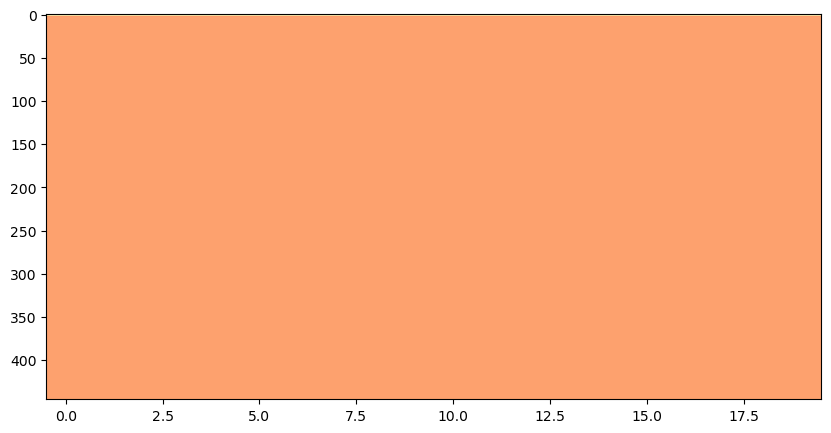

In [14]:
fig6 = plt.figure(figsize=(10,5))
r =20
SVt = sigma @ Vt
plt.imshow(SVt[:,:r], aspect='auto', cmap='magma')

In [15]:
################################
# Reporting. Do not modify.#####
result['fig6'] = fig6
################################

# 7) Plot the compressed images for r=2, r=5, r=50 (6 pts)

Plot each one with `ax[i].imshow` with `i` varying from 0 to 2, so that the images appear in a row.


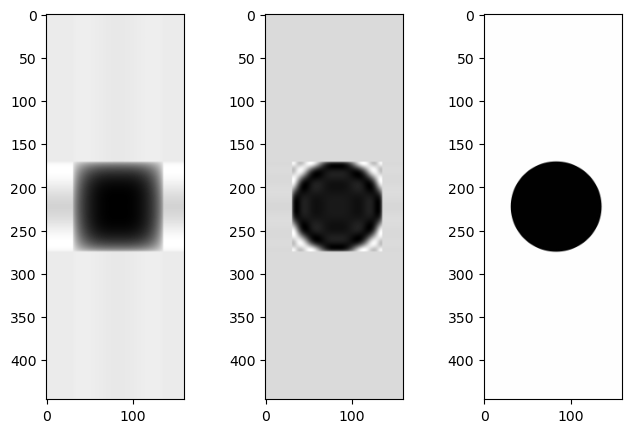

In [16]:
fig7, ax = plt.subplots(figsize=(8,5),nrows=1,ncols=3)
comp_im = U @ sigma @ Vt
rs = [2, 5, 50]
index = 0
for r in rs:
    ax[index].imshow((U[:,:r] @ np.diag(s[:r])) @ Vt[:r], cmap='gray')
    index += 1

In [17]:
################################
# Reporting. Do not modify.#####
result['fig7'] = fig7
################################

# 8) Plot the sum of the first $r$ singular values as a function of $r$ (6 pts)

Hint: [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

Text(0, 0.5, 'Cumulative sum of singular values')

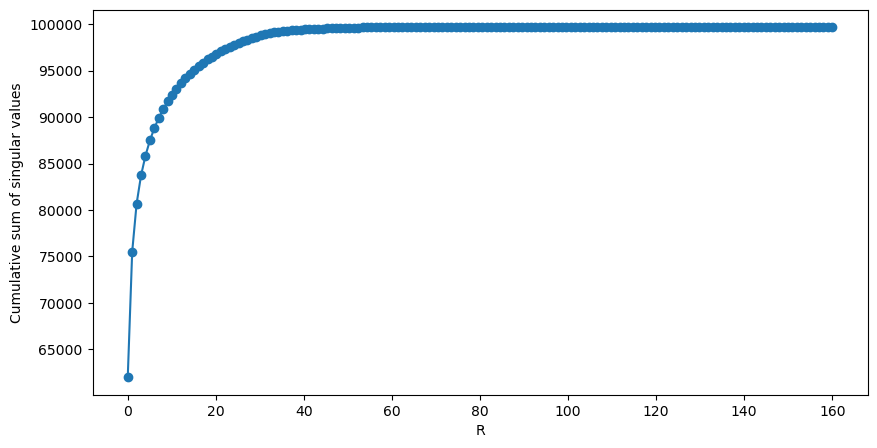

In [18]:
fig8 = plt.figure(figsize=(10,5))
cumsum = np.cumsum(s)  
plt.scatter(np.linspace(0, len(s), len(s)),cumsum)
plt.plot(np.linspace(0, len(s), len(s)),cumsum)
plt.xlabel("R")
plt.ylabel("Cumulative sum of singular values")

In [19]:
################################
# Reporting. Do not modify.#####
result['fig8'] = fig8
################################

# 9) How many columns should be kept to preserve 90% of the total sum of singular values? (4 pts)
Record your answer as `cols90`

In [20]:
values = []
for value in cumsum:
    if value < max(cumsum)*0.9:
        values.append(value)
cols90 = len(values)# Add you code here
cols90

7

In [21]:
################################
# Reporting. Do not modify.#####
result['cols90'] = cols90
################################

---
## Do not modify below this

In [22]:
with open('hw3_prob1_{}.pickle'.format(result['SID']),'wb') as file:
    pickle.dump(result,file)